### Unsupervised learning 

Type of machine learning where the algorithm is trained on a dataset that does not have any labeled responses or outcomes. The goal is to find the underlying patterns, structures, or features in the dataset. 

Characteristics and types of unsupervised learning include: 

1. Dimensionality reduction such as PCA 
2. Clustering
3. Association rule learning
4. Anomaly detection
5. Feature learning

#### Dimensionality reduction such as PCA

It is used ro reduce the number of input variables or features of a dataset. The primary goal is to simplify the dataset whilst retaining as much of the significant information as possible. This is to help with dealthing with the curse of dimensionality, where the performance of a ML algorithm degrades as the number of features increases. 

##### Feature selection:

1. Filter methods - statistical measures to score each feature and select those with the highest scores, such as correlation or chi-squared tests.

2. Wrapper methods - evaluate multiple models, each with a different subset of features and select the sibset that results in the best model performance.  

3. Embedded methods - the lasso regression, which includes a penalty term that shrinks the coefficients to zero, effectively selecting a subset of features


##### Feature extraction:

1. PCA - transforms the data into a new coordinate system,reducing the number of dimensions whilst retaining the most of the variance in the data. The new dimensions are linear combinations of the original features. 

2. Linear Discriminant Analysis (LDA) - LDA is used as a dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. It projects the data onto a lower-dimensional space with good class-separability in order to avoid overfitting.


##### Benefits of dimensionality reduction 

1. Reduces overfitting 
2. Improves model performance 
3. Easier visualisation 
4. Reduces storage space

It's particularly useful in fields like image processing, NLP and bioinformatiocs where there is high dimensionality data, however, it's important to understand that while it can stratify and simplify models it can also lead to a loss of information. So the trade off between simplicity and information retention has to be managed. 

#### PCA and how it works 

1. Standardisation - standardise the data so each feature contributes equally to the analysis, this involves scaling the data so that each feature contributes to the analysis. Scale the data so that each feature has a mean of 0 and a standard deviation of 1. 
2. Covariance matrix computation - compute the covariance matrix to undersand how each variable in the data relates to other variables, this allows us to understand correlation between different variables 
3. Eigenvalue and eigenvector calculations - compute the eigenvalue and eigenvectors of the covariance matrix. Eigenvectors point in the direction of the most variance in the data, and eifenvalues represent the magnitude of the variance. The eigenvectors are the principle components. 
4. Sort the eigenvalues and eigenvectors
5. Project data on the principle components 

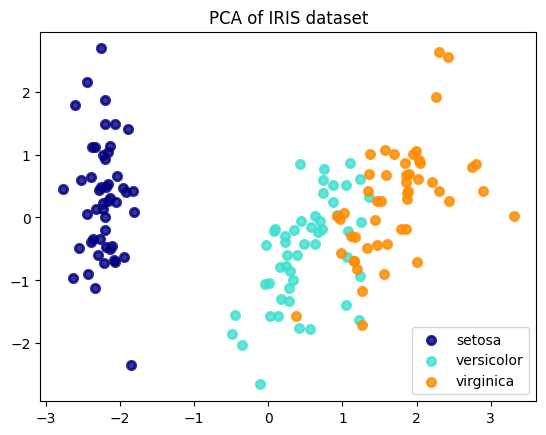

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
X, y = load_iris(return_X_y=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA-transformed version of the data
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], load_iris().target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()


In [68]:
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

Now looking at RCF but not the same as PCA!

In [11]:
#### Recursive feature elimination 

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Load Iris dataset
X, y = load_iris(return_X_y=True)

# Create a logistic regression classifier
model = LogisticRegression(max_iter=200)

# Create the RFE model and select 2 attributes
rfe = RFE(model, n_features_to_select=2)
rfe = rfe.fit(X, y)

# Print the chosen features
print('Selected features:', rfe.support_)

Selected features: [False False  True  True]


#### K-means clustering 

Is a simple and elegant approach for partitioning a data set into K distinct, non-overlapping clusters. To perform K-means clustering, we must first specify the desired number of clusters K; then the K-means algorithm will assign each observation to exactly one of the K clusters.

##### How the algorithm works

1. Randomly assign a number from 1 to K, to each observations (these serve as the iniital cluster assignments for the observations)
2. Iterate until the cluster assignments stop changing (for each of the k clusters compute the cluster centroid, the kth cluster centroid is the vector of the p feature means for the observations in the kth cluster)
3. Assign each observation to the cluster whose centroid is the closest (closest is defined using Euclidean distance)

##### Finding the optimum number of clusters (K)?

- Use an elbow curve: this runs k-means clustering on the dataset for a range of values 
- This allows you to perform k-means clustering with all the different values of k 
- For each of the k values we calculate the distances to the centroid across all data points 
- We then plot these points and find the point where the average distance from the centroid falls quickly

##### Silhouette Analysis: 

- Measures how similar a data point is within-clusters (cohesion) compared to other clusters (seperation)


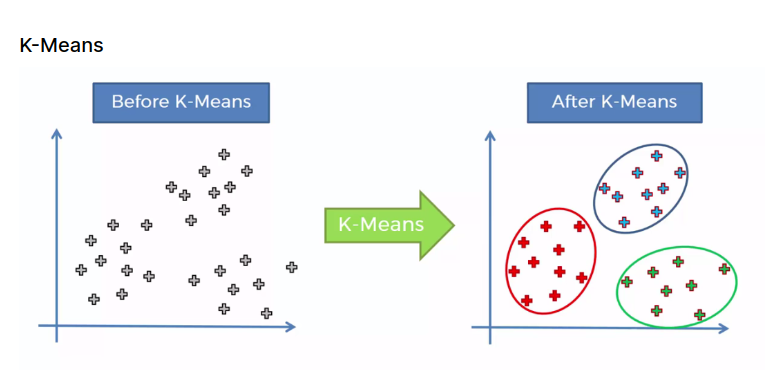

#### Find the distances between two vectors

1. Hamming Distance
2. Euclidean Distance 
3. Manhattan Distance
4. Minkowski Distance


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs,make_moons
import time
from matplotlib.colors import ListedColormap
from joblib import dump, load

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [15]:
df = pd.read_csv('./data/bank_marketing_dataset.csv')
df.shape

(41188, 21)

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


Text(0.5, 1.0, 'Age distribution of customers')

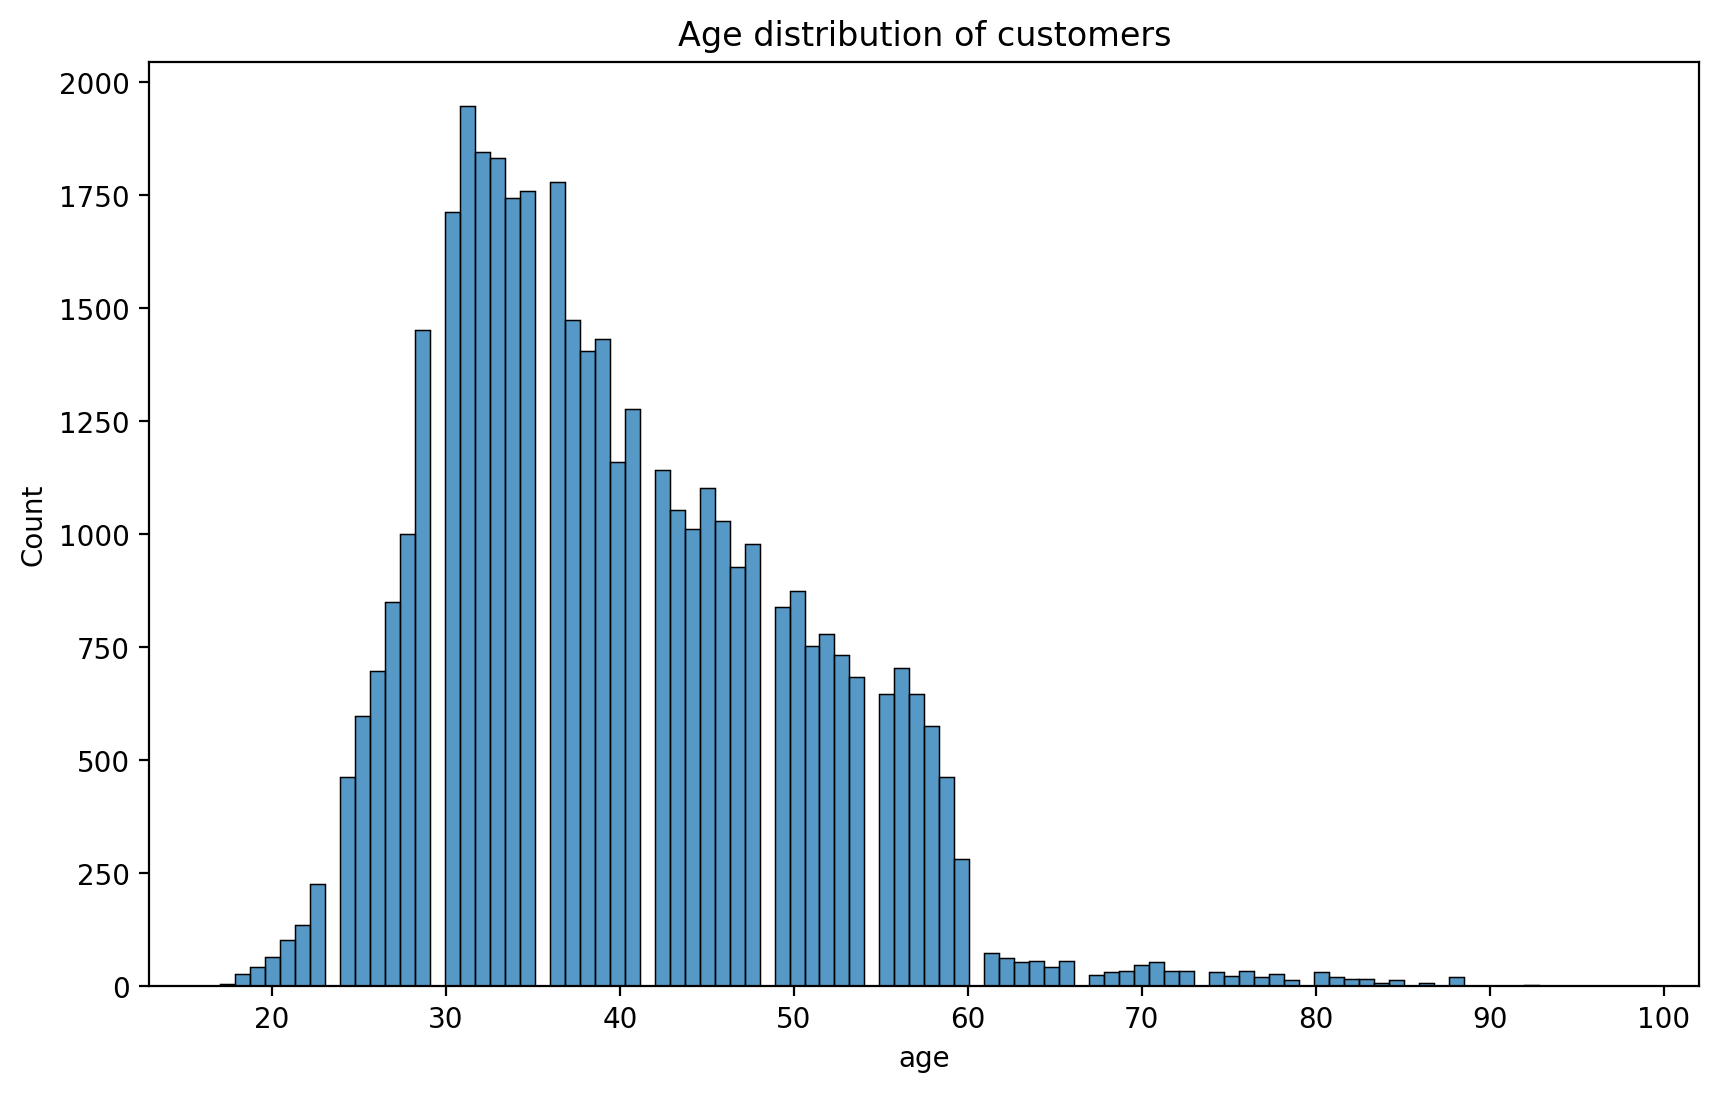

In [22]:
# understand the age distribution 

plt.figure(figsize=(10,6), dpi=200)
sns.histplot(data=df, x='age')
plt.title('Age distribution of customers')

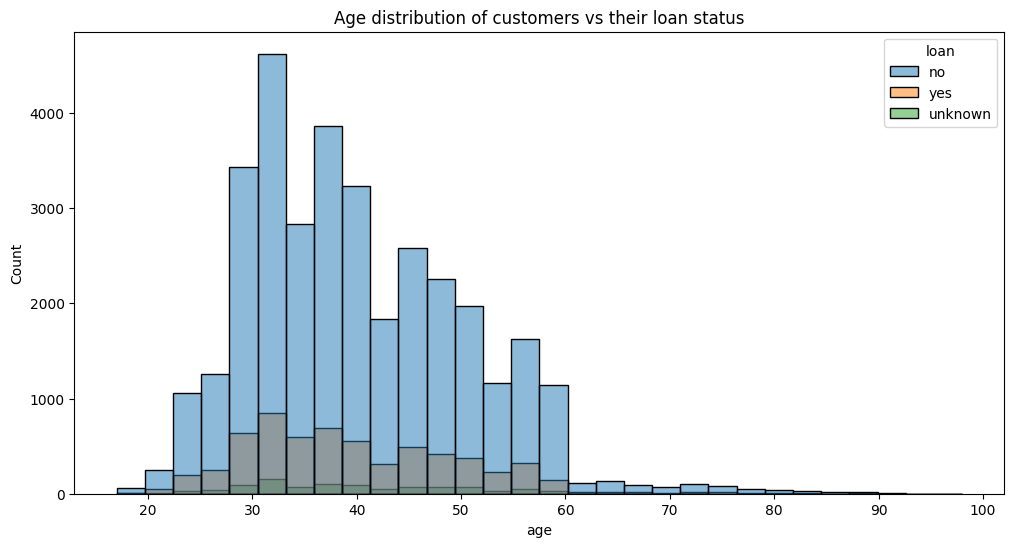

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='age', hue='loan', bins=30)
plt.title('Age distribution of customers vs their loan status')
plt.show()

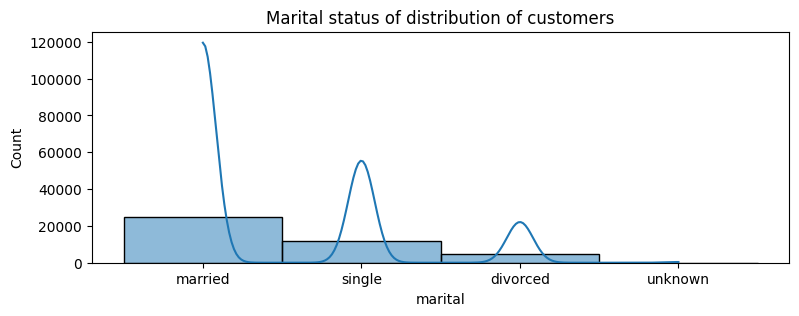

In [25]:
# Marital status distribution of customers

plt.figure(figsize=(9,3))
sns.histplot(data = df, x='marital', kde=True)
plt.title('Marital status of distribution of customers')
plt.show()

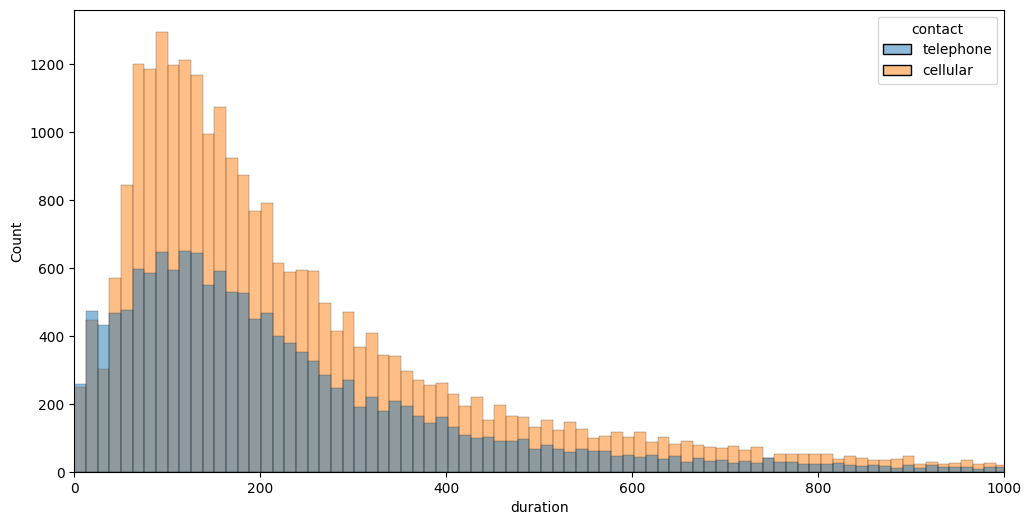

In [26]:
# Duration of contact types  

plt.figure(figsize=(12,6))
sns.histplot(data=df, x='duration', hue='contact')
plt.xlim(0,1000)
plt.show()

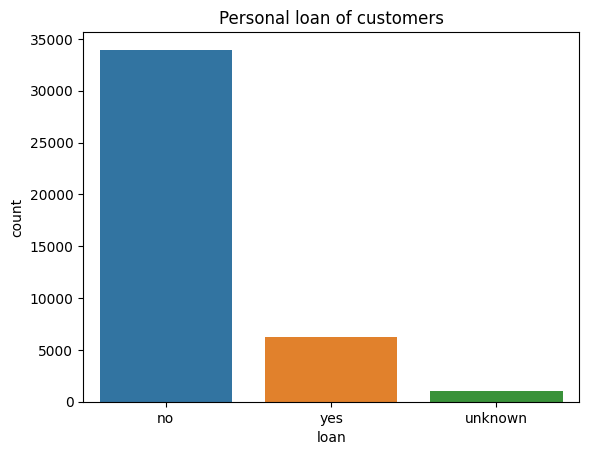

In [27]:
# Customer status

sns.countplot(data=df, x='loan')
plt.title('Personal loan of customers')
plt.show()

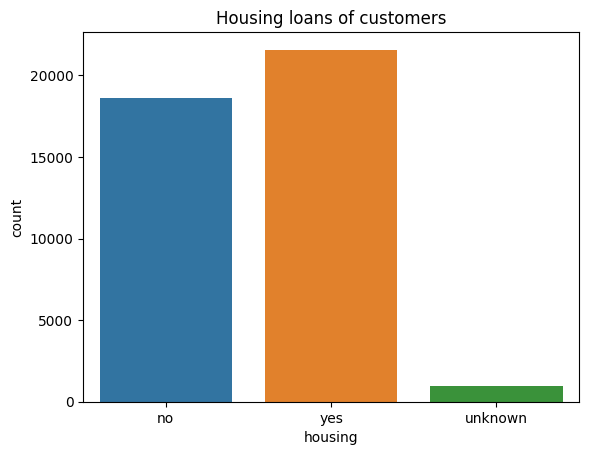

In [69]:
# Looking at housing loans of a customer 

sns.countplot(data=df, x='housing')
plt.title('Housing loans of customers')
plt.show()

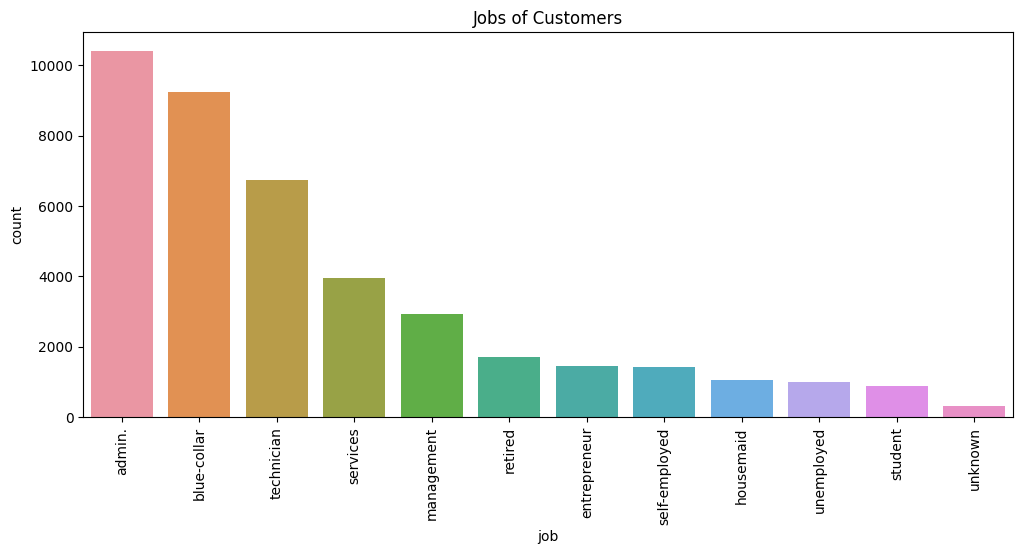

In [29]:
# Customer jobs

plt.figure(figsize=(12,5))
sns.countplot(data=df, x='job', order=df.job.value_counts().index)
plt.title('Jobs of Customers')
plt.xticks(rotation=90)
plt.show()

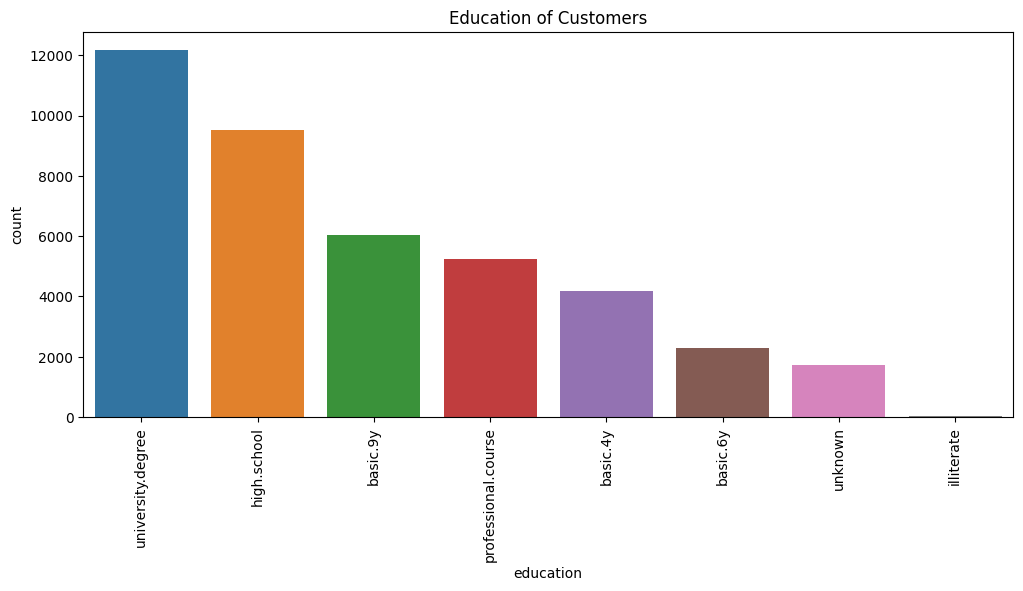

In [30]:
# Customer education 

plt.figure(figsize=(12,5))
sns.countplot(data=df, x='education', order=df.education.value_counts().index)
plt.title('Education of Customers')
plt.xticks(rotation=90)
plt.show()

In [32]:
# To apply K-means clustering all the features need to be numeric so we apply the get_dummies() method

df.shape

(41188, 21)

In [40]:
df_dummies = pd.get_dummies(df, dtype=int)

In [41]:
df_dummies.shape
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


In [43]:
# Apply scaling - dealing with distance

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_dummies)
df_scaled[0]

array([ 1.53303429,  0.01047142, -0.56592197,  0.1954139 , -0.34949428,
        0.64809227,  0.72272247,  0.88644656,  0.71245988,  0.33167991,
       -0.58202282, -0.53831699, -0.19143021,  6.15277204, -0.2764353 ,
       -0.2087573 , -0.18903213, -0.3265564 , -0.1473267 , -0.44244927,
       -0.15887166, -0.08987076, -0.35509663,  0.80763764, -0.62493754,
       -0.04411455,  2.97708361, -0.24274754, -0.41474269, -0.54809999,
       -0.0209096 , -0.38191849, -0.64753149, -0.20945296,  0.51371278,
       -0.51359953, -0.00853476,  1.10081447, -0.1569334 , -1.04887691,
        0.46173139, -0.1569334 , -0.42287213, -1.31826996,  1.31826996,
       -0.26127446, -0.42007603, -0.06662113, -0.45925282, -0.38504233,
       -0.11590677,  1.41115463, -0.33253245, -0.13319736, -0.11846175,
       -0.484371  ,  1.95899952, -0.51458089, -0.49439422, -0.4960667 ,
       -0.3392905 ,  0.39770593, -0.1857    ,  0.35630932, -0.35630932])

In [44]:
k_means_model = KMeans(n_clusters=2)
k_means_model.fit(df_scaled)


/home/vaishnavi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [45]:
cluster_labels = k_means_model.predict(df_scaled)
cluster_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [46]:
df_dummies['Cluster'] = cluster_labels

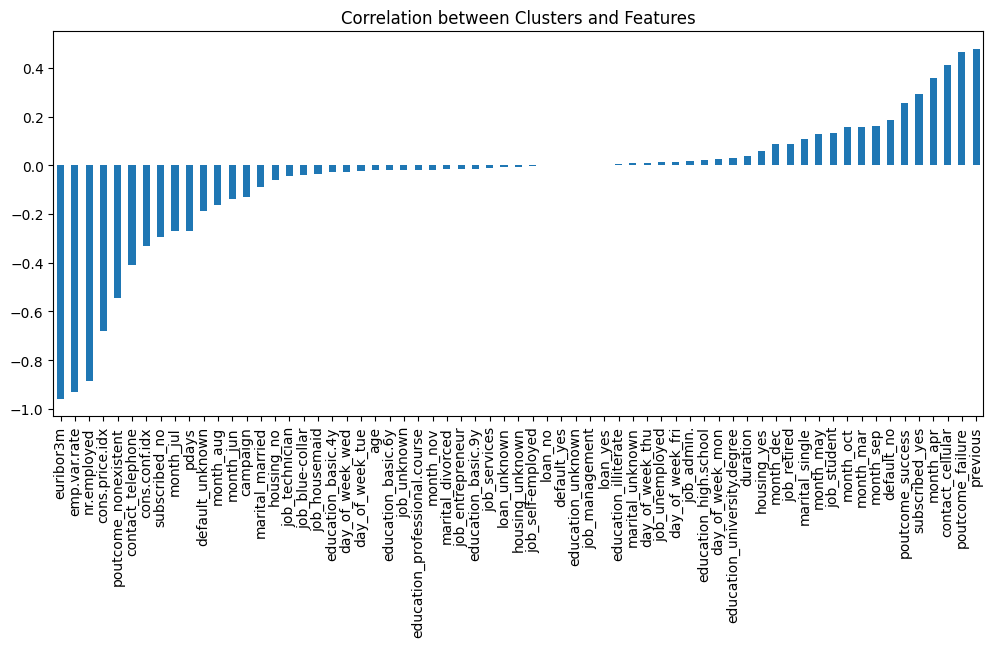

In [52]:
# See the correlation of each feature with the clusters assigned 

plt.figure(figsize=(12,5))
df_dummies.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')
plt.title('Correlation between Clusters and Features')
plt.show()

### Finding the optimal values of clusters - Elbow curve

Perform K-means clustering with all these different values of K. For each of the K values, we calculate average distances to the centroid across all data points. Then we Plot these points and find the point where the average distance from the centroid falls suddenly (“Elbow”). We want high similarity(Max) inside clusters and low similarity interclusters(Min) to find optimized sum of squared distance(SSD).


In [53]:
ssd = []

for k in range(2,12):
    model = KMeans(n_clusters=k)
    model.fit(df_dummies)
    ssd.append(model.inertia_) # cluster center

/home/vaishnavi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/vaishnavi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/vaishnavi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/vaishnavi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/vaishnavi/.loc

In [54]:
ssd

[2735461311.8773093,
 1321035049.93557,
 851056306.6344221,
 642597051.1217034,
 531528559.95820063,
 440298162.77330875,
 376952899.3087225,
 326257743.71729064,
 284893071.8506774,
 246633049.85769546]

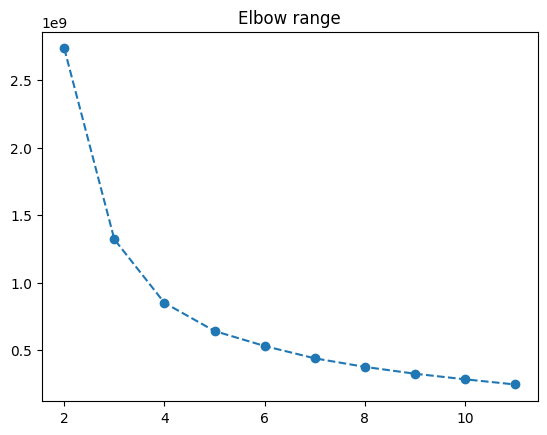

In [56]:
plt.plot(range(2,12), ssd, "o--")
plt.title("Elbow range")
plt.show()


# The point where the rate of the decrease sharply changes is considered the optimal number of clusters (just like an elbow)
# Beyond this point adding more clusters doesn't provide much modelling benefit
# Sometimes the elbow is not very pronounced and therefore the choice of the optimal number can be subjective
# The effectiveness of the elbow method can depend on the characteristics of the data 

### Why do we scale the data?

Scaling the data before implementing k-means is essential for a number of reasons. 

1. Feature magnitude impact: 
- K-means works by calculating the distance beween data points and the centroid of the clusters. If the features in the dataset are on different scales the feature with a larger scale will sominate the distance calculation, leading to potentially biased clustering. 
- A dataset with one feature in the range of 0-1 and another in the range 0-1000, the latter will disproprionately influence the clustering outcome 


2. Improved convergence:
- Scaling ensures that the feature contributes equally to the distance computed.
- Therefore, the algorithm will find the optimal number of clusters more efficiently.

3. Interpretability:
- Features are on the same scale, therefore it is easier to interpret the relative improtace of features in the cluster assignments. 
- Without scaling it's difficult to assess whether differences are a result of the scale in that feature.

4. Units:
- Different features are measured in different units, scaling removes the units and alloes for a fair comparison between the different features

#### Types of Scaling

1. Standardisation - transforms the feature to have a mean of 0 and a standard deviation of 1 
2. Min-Max Scaling - this rescales the feature to a fixed range (between 0 and 1), it's useful when the data doesn't have a gaussian distribution

### Standardisation and min-max scaling

Standardisation rescales the data to have a mean of 0 and a standard deviation of 1. The formula is:

$$ z = \frac{(x-\mu)}{\sigma} $$

In [57]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example data
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(data)

print("Standardized Data:")
print(standardized_data)


Standardized Data:
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


In [61]:
# Why does this output not equal the output from the standard scalar output?

data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

data_mean = data.mean()
data_std = data.std()

(data -data_mean)/data_std

array([[-1.54919334, -1.161895  , -0.77459667],
       [-0.38729833,  0.        ,  0.38729833],
       [ 0.77459667,  1.161895  ,  1.54919334]])

In [64]:
# The reason is that standard scalar finds the mean and standard deviation from each column and then applies the computation across each column (rather than the entire dataset)

import numpy as np

data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Calculate the mean and standard deviation for each column (feature)
data_mean = data.mean(axis=0)
data_std = data.std(axis=0)

# Apply the standardization per feature
standardized_data = (data - data_mean) / data_std

print(standardized_data)


[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


### Min max scalar

The min max scalar shrinks the data to a specified range, typically from 0 to 1. The formula is:

$$ {xscaled} = \frac{(x-xmin)}{(xmax - xmin)} $$



In [65]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Example data
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

print("Min-Max Scaled Data:")
print(scaled_data)


Min-Max Scaled Data:
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


In [66]:
# Again column wise calculations
data_min = data.min(axis=0)
data_max = data.max(axis=0)
standardised_min_max = (data - data_min) / (data_max - data_min)

standardised_min_max


array([[0. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [1. , 1. , 1. ]])